<a href="https://colab.research.google.com/github/GuilhermeGwrAdm/Desafio-AluraStoreBR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [77]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [62]:
nome_lojas = ['loja1','loja2','loja3','loja4']
vendas =[loja['Preço'],loja2['Preço'],loja3['Preço'],loja4['Preço']]
qtd_vendas = [len(loja),len(loja2),len(loja3),len(loja4)]
lista_faturamentos = []

for i in vendas:
  fat_por_loja = round(sum(i),2)
  lista_faturamentos.append(fat_por_loja)

analise_faturamentos = [(nome, venda, qtd) for nome, venda, qtd in zip(nome_lojas,lista_faturamentos, qtd_vendas)]
print(analise_faturamentos)

[('loja1', 1534509.12, 2359), ('loja2', 1488459.06, 2359), ('loja3', 1464025.03, 2359), ('loja4', 1384497.58, 2358)]


In [63]:
menor_fat = min(analise_faturamentos, key=lambda x: x[1])
maior_fat = max(analise_faturamentos, key=lambda x: x[1])

print(f'A loja com menor faturamento:{menor_fat}')
print(f'A loja com maior faturamento:{maior_fat}')

A loja com menor faturamento:('loja4', 1384497.58, 2358)
A loja com maior faturamento:('loja1', 1534509.12, 2359)


# 2. Vendas por Categoria


In [64]:
dados = {'loja1':loja.groupby('Categoria do Produto')['Preço'].sum(),
         'loja2':loja2.groupby('Categoria do Produto')['Preço'].sum(),
         'loja3':loja3.groupby('Categoria do Produto')['Preço'].sum(),
         'loja4':loja4.groupby('Categoria do Produto')['Preço'].sum()}
lista_dados_categoria = [dados.values()]

for loja , dados in dados.items():
    print(lista_dados_categoria)


[dict_values([Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64, Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64, Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis                   268095.56
utilidades domesticas     20080.21
Name: Preço, dtype: float

# 3. Média de Avaliação das Lojas

In [68]:
avalicao_loja = [loja['Avaliação da compra'],loja2['Avaliação da compra'],loja3['Avaliação da compra'],loja4['Avaliação da compra']]
lista_avaliacao = []

for i in avalicao_loja:

  avaliacao_por_loja = round(sum(i)/len(i),2)
  lista_avaliacao.append(avaliacao_por_loja)

analise_avaliacao = [(nome, avaliacao) for nome, avaliacao in zip(nome_lojas,lista_avaliacao)]
print(analise_avaliacao)

for i in range(len(nome_lojas)):
  print(f'A loja {nome_lojas[i]} tem uma avaliação de {lista_avaliacao[i]}')

[('loja1', 3.98), ('loja2', 4.04), ('loja3', 4.05), ('loja4', 4.0)]
A loja loja1 tem uma avaliação de 3.98
A loja loja2 tem uma avaliação de 4.04
A loja loja3 tem uma avaliação de 4.05
A loja loja4 tem uma avaliação de 4.0


# 4. Produtos Mais e Menos Vendidos

In [69]:
import pandas as pd
lojas = [loja, loja2, loja3, loja4]

print("\nAnálise de Produtos Mais Vendidos por Loja:")

for i in range(len(lojas)):
    df_loja = lojas[i]
    nome_loja = nome_lojas[i]

    # Calcular a quantidade vendida por produto
    contagem_produtos = df_loja['Produto'].value_counts()

    # Calcular o faturamento por produto (Preço - Frete)
    df_loja['Faturamento_Liquido'] = df_loja['Preço'] - df_loja['Frete']
    faturamento_produto = df_loja.groupby('Produto')['Faturamento_Liquido'].sum()

    # Combinar quantidade e faturamento em um DataFrame temporário
    df_ranking = pd.DataFrame({
        'Quantidade_Vendida': contagem_produtos,
        'Faturamento_Liquido': faturamento_produto
    }).fillna(0) # Preenche produtos que não foram vendidos com 0 em faturamento

    # Ordenar primeiro por Quantidade_Vendida (desc) e depois por Faturamento_Liquido (desc)
    df_ranking_sorted = df_ranking.sort_values(by=['Quantidade_Vendida', 'Faturamento_Liquido'], ascending=[False, False])

    # Obter o produto mais vendido (primeira linha após ordenação)
    produto_mais_vendido = df_ranking_sorted.index[0]
    qtd_mais_vendido = df_ranking_sorted.iloc[0]['Quantidade_Vendida']
    faturamento_mais_vendido = df_ranking_sorted.iloc[0]['Faturamento_Liquido']
    ticket_medio_mais_vendido = faturamento_mais_vendido / qtd_mais_vendido if qtd_mais_vendido > 0 else 0


    print(f"Loja: {nome_loja}")
    print(f"  Produto mais vendido: {produto_mais_vendido} ({int(qtd_mais_vendido)} unidades)")
    if qtd_mais_vendido > 1:
        print(f"    Faturamento líquido total: R${faturamento_mais_vendido:.2f}")
        print(f"    Ticket médio: R${ticket_medio_mais_vendido:.2f}")
    print("-" * 20)



Análise de Produtos Mais Vendidos por Loja:
Loja: loja1
  Produto mais vendido: TV Led UHD 4K (60 unidades)
    Faturamento líquido total: R$179412.73
    Ticket médio: R$2990.21
--------------------
Loja: loja2
  Produto mais vendido: Iniciando em programação (65 unidades)
    Faturamento líquido total: R$3953.26
    Ticket médio: R$60.82
--------------------
Loja: loja3
  Produto mais vendido: Kit banquetas (57 unidades)
    Faturamento líquido total: R$21066.27
    Ticket médio: R$369.58
--------------------
Loja: loja4
  Produto mais vendido: Cama box (62 unidades)
    Faturamento líquido total: R$41593.03
    Ticket médio: R$670.86
--------------------


In [70]:
qtd_lojas = [loja['Produto'].value_counts(),
             loja2['Produto'].value_counts(),
             loja3['Produto'].value_counts(),
             loja4['Produto'].value_counts()]

max_qtd_vendida_loja = []
min_qtd_vendida_loja = []
produto_mais_vendido_nome = []
produto_menos_vendido_nome = []

for i in range(len(qtd_lojas)):
  # Usando .max() e .idxmax() para o produto mais vendido
  venda_max = qtd_lojas[i].max()
  produto_max_nome = qtd_lojas[i].idxmax()
  max_qtd_vendida_loja.append(venda_max)
  produto_mais_vendido_nome.append(produto_max_nome)

  # Usando .min() e .idxmin() para o produto menos vendido
  venda_min = qtd_lojas[i].min()
  produto_min_nome = qtd_lojas[i].idxmin()
  min_qtd_vendida_loja.append(venda_min)
  produto_menos_vendido_nome.append(produto_min_nome)

print("Análise de Produtos Mais e Menos Vendidos por Loja:")
for i in range(len(nome_lojas)):
  print(f"Loja: {nome_lojas[i]}")
  print(f"  Produto mais vendido: {produto_mais_vendido_nome[i]} ({max_qtd_vendida_loja[i]} unidades)")
  print(f"  Produto menos vendido: {produto_menos_vendido_nome[i]} ({min_qtd_vendida_loja[i]} unidades)")
  print("-" * 20)

Análise de Produtos Mais e Menos Vendidos por Loja:
Loja: loja1
  Produto mais vendido: Micro-ondas (60 unidades)
  Produto menos vendido: Headset (33 unidades)
--------------------
Loja: loja2
  Produto mais vendido: Iniciando em programação (65 unidades)
  Produto menos vendido: Jogo de tabuleiro (32 unidades)
--------------------
Loja: loja3
  Produto mais vendido: Kit banquetas (57 unidades)
  Produto menos vendido: Blocos de montar (35 unidades)
--------------------
Loja: loja4
  Produto mais vendido: Cama box (62 unidades)
  Produto menos vendido: Guitarra (33 unidades)
--------------------


# 5. Frete Médio por Loja


In [71]:
fretes_lojas = [loja['Frete'].sum(),
              loja2['Frete'].sum(),
              loja3['Frete'].sum(),
              loja4['Frete'].sum()]

fretes_lojas_medio = [round((i/qtd),2) for i,qtd in zip(fretes_lojas,qtd_vendas)]

for i in range(len(nome_lojas)):
  print(f'A loja {nome_lojas[i]} tem um frete médio de R${fretes_lojas_medio[i]}')





A loja loja1 tem um frete médio de R$34.69
A loja loja2 tem um frete médio de R$33.62
A loja loja3 tem um frete médio de R$33.07
A loja loja4 tem um frete médio de R$31.28


In [72]:
# faturamento Vs Fretes

rentabilidade_loja = []
fretes_loja = [i for i in fretes_lojas]
Faturamento_liquido = [round((fat - fretes),2) for fat , fretes in zip(lista_faturamentos,fretes_loja)]
for i in range(len(nome_lojas)):
  rentabilidade_media = round((Faturamento_liquido[i]/qtd_vendas[i]),2)
  rentabilidade_loja.append(rentabilidade_media)
  print(f'A loja {nome_lojas[i]} tem um faturamento líquido de R${Faturamento_liquido[i]}')
  print(f'A loja {nome_lojas[i]} tem uma rentabilidade média de R${rentabilidade_media}')



A loja loja1 tem um faturamento líquido de R$1452671.15
A loja loja1 tem uma rentabilidade média de R$615.8
A loja loja2 tem um faturamento líquido de R$1409144.9
A loja loja2 tem uma rentabilidade média de R$597.35
A loja loja3 tem um faturamento líquido de R$1386002.37
A loja loja3 tem uma rentabilidade média de R$587.54
A loja loja4 tem um faturamento líquido de R$1310741.7
A loja loja4 tem uma rentabilidade média de R$555.87


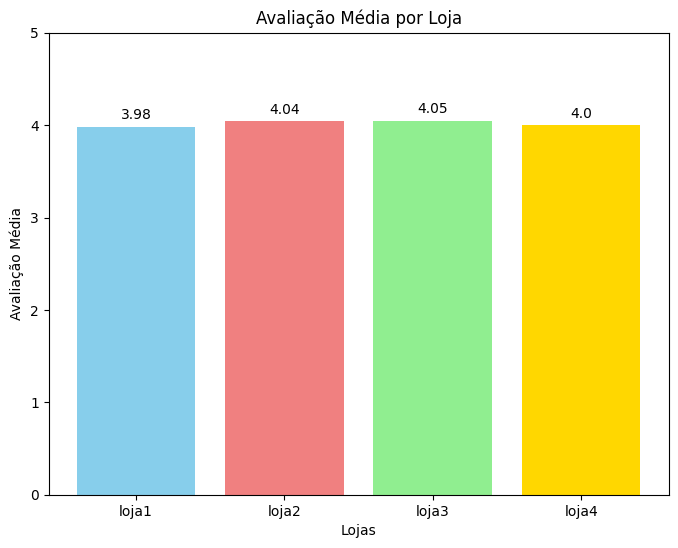

In [100]:
import matplotlib.pyplot as plt

# Certifique-se de que as variáveis nome_lojas e lista_avaliacao foram definidas
if 'nome_lojas' in locals() and 'lista_avaliacao' in locals():
  plt.figure(figsize=(8, 6)) # Define o tamanho da figura

  for i in range(len(nome_lojas)):
    # Criando a barra para a loja atual
    plt.bar(nome_lojas[i], lista_avaliacao[i], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'][i]) # Adicionando cor por barra

    # Adicionando a anotação de texto no topo da barra atual
    yval = lista_avaliacao[i] # Obtém o valor da avaliação para a loja atual
    plt.text(i, yval + 0.05, round(yval, 2), ha='center', va='bottom') # Posiciona o texto no topo da barra. Usamos o índice i como posição x.

  # Adicionando rótulos e título
  plt.xlabel('Lojas')
  plt.ylabel('Avaliação Média')
  plt.title('Avaliação Média por Loja')
  plt.ylim(0, 5) # Define o limite do eixo y para a escala de avaliação


  # Exibindo o gráfico
  plt.show()
else:
  print("As variáveis 'nome_lojas' ou 'lista_avaliacao' não foram definidas. Por favor, execute as células relevantes primeiro.")

O gráfico demostra que a loja 1 apresenta a pior avalição.

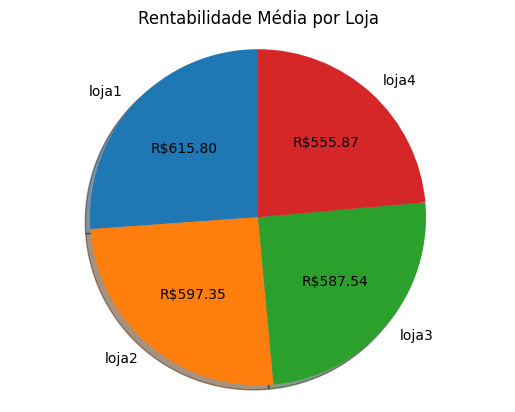

In [73]:
# prompt: utilizando a lista rentabilidade loja gerar grafico pizza  de cada loja.  Informando a rentablidade media e não o percentual

import matplotlib.pyplot as plt
# Preparar os dados para o gráfico de pizza
# Estamos usando a lista `rentabilidade_loja` que já foi calculada
# O nome das lojas está na lista `nome_lojas`

labels = nome_lojas
sizes = rentabilidade_loja # Usamos a rentabilidade média diretamente como o tamanho da fatia

# Criar o gráfico de pizza
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: f'R${pct*sum(sizes)/100:.2f}',
        shadow=True, startangle=90) # Aqui formatamos o valor exibido para ser a rentabilidade média
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Rentabilidade Média por Loja')
plt.show()


O gráfico demonstra que a loja 4 apresenta a pior rentabilidade em comparação com as demais.

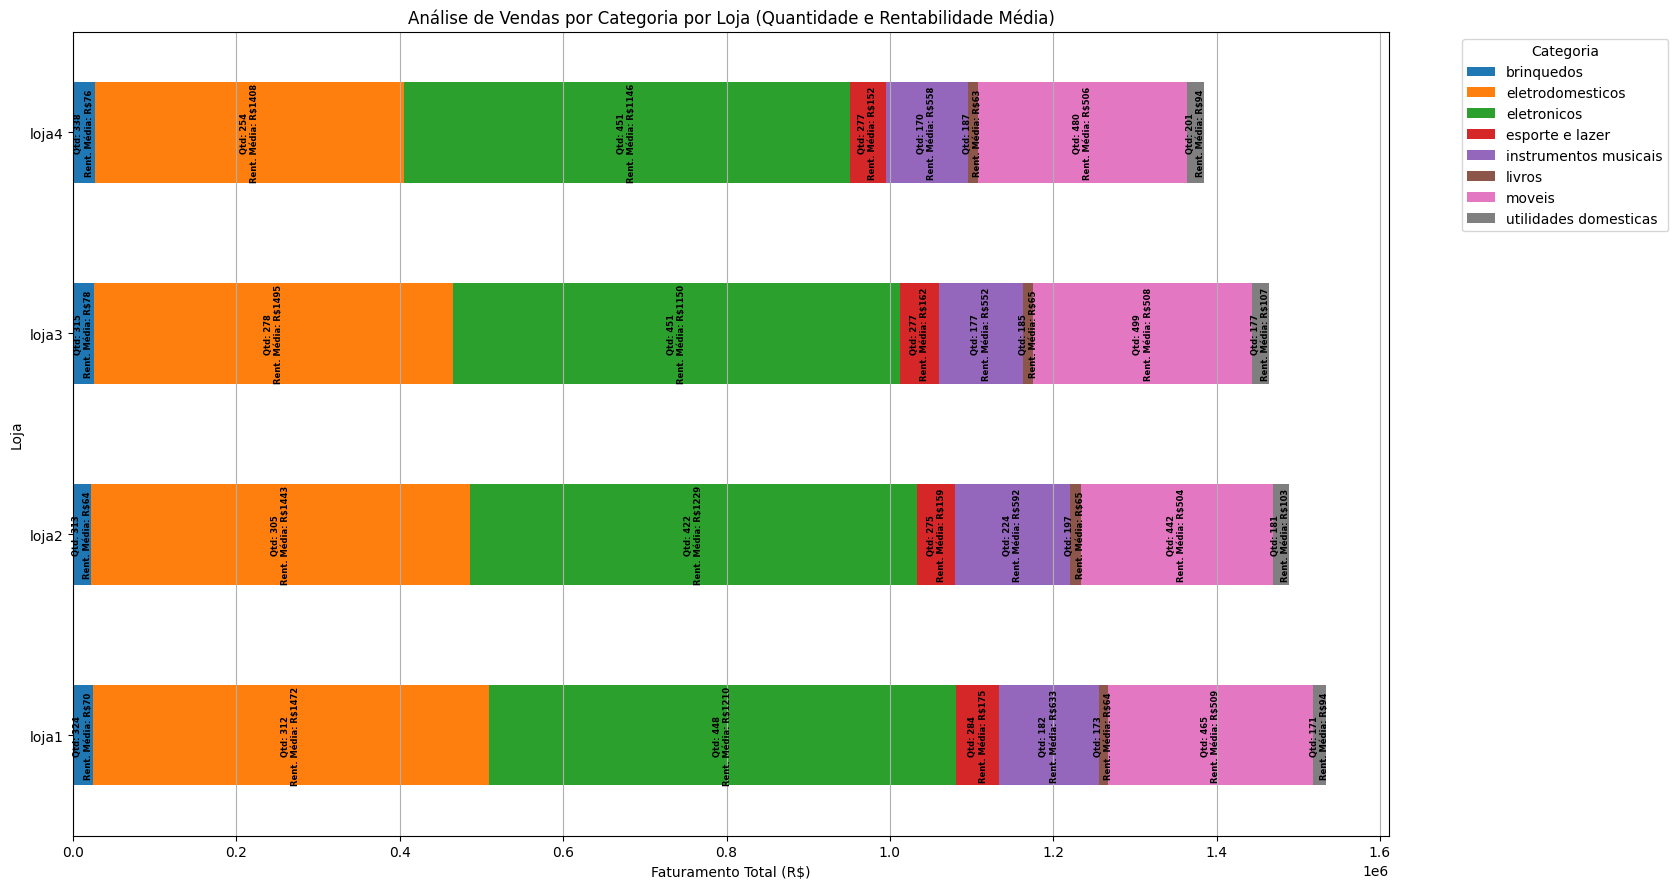

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenar todos os DataFrames das lojas em um único DataFrame
lojas_df = pd.concat([
    loja.assign(Loja='loja1'),
    loja2.assign(Loja='loja2'),
    loja3.assign(Loja='loja3'),
    loja4.assign(Loja='loja4')
])

# Calcular o Faturamento Líquido para cada transação
lojas_df['Faturamento_Liquido_Item'] = lojas_df['Preço'] - lojas_df['Frete']

# Agrupar por Loja e Categoria do Produto para obter o Faturamento Líquido total
dados_faturamento_liquido_por_categoria_por_loja = lojas_df.groupby(['Loja', 'Categoria do Produto'])['Faturamento_Liquido_Item'].sum().reset_index(name='Faturamento_Liquido')

# Agrupar por Loja e Categoria do Produto para obter a QUANTIDADE vendida
dados_quantidade_por_categoria_por_loja = lojas_df.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')

# Combinar Faturamento Líquido e Quantidade em um único DataFrame
dados_combinados = pd.merge(dados_faturamento_liquido_por_categoria_por_loja,
                            dados_quantidade_por_categoria_por_loja,
                            on=['Loja', 'Categoria do Produto'])

# Calcular a Rentabilidade Média (Faturamento Líquido / Quantidade)
# Evitar divisão por zero caso Quantidade seja 0
dados_combinados['Rentabilidade_Media'] = dados_combinados.apply(
    lambda row: row['Faturamento_Liquido'] / row['Quantidade'] if row['Quantidade'] > 0 else 0,
    axis=1
)


# Pivotar os dados para plotagem (mantendo o Faturamento Total para o comprimento das barras)
dados_faturamento_total_por_categoria_por_loja = lojas_df.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().reset_index(name='Faturamento_Total')
dados_faturamento_total_pivotados = dados_faturamento_total_por_categoria_por_loja.pivot(index='Loja', columns='Categoria do Produto', values='Faturamento_Total').fillna(0)

# Pivotar os dados combinados para facilitar o acesso às anotações
dados_anotacoes_pivotados = dados_combinados.pivot(index='Loja', columns='Categoria do Produto').fillna(0)


ax = dados_faturamento_total_pivotados.plot(kind='barh', stacked=True, figsize=(20, 9)) # Aumenta a largura da figura

plt.title('Análise de Vendas por Categoria por Loja (Quantidade e Rentabilidade Média)')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Loja')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')

# Adicionar as anotações de Quantidade e Rentabilidade Média nas barras
for container in ax.containers:
    labels = container.get_label() # Obtém o rótulo da categoria

    # Acessar os dados de anotação para a categoria atual
    quantidade_por_categoria = dados_anotacoes_pivotados[('Quantidade', labels)]
    rentabilidade_media_por_categoria = dados_anotacoes_pivotados[('Rentabilidade_Media', labels)]


    for j, rect in enumerate(container.patches):
        width = rect.get_width() # Comprimento do segmento de barra (faturamento total)
        # Obter os valores de anotação para esta categoria nesta loja
        quantidade_vendida = quantidade_por_categoria.iloc[j]
        rentabilidade_media = rentabilidade_media_por_categoria.iloc[j]

        # Adicionar o texto no centro do segmento da barra
        x_position = rect.get_x() + width / 2.
        y_position = rect.get_y() + rect.get_height() / 2.

        # Criar a string de anotação (Quantidade e Rentabilidade Média)
        # Adicionar a anotação se a quantidade for maior que 0
        if quantidade_vendida > 0:
             # Formatando para duas linhas verticais
             annotation_text = f'Qtd: {int(quantidade_vendida)}\nRent. Média: R${rentabilidade_media:.0f}'

             ax.text(x_position, y_position, annotation_text,
                    ha='center', va='center', color='black', fontsize=6, weight='bold', rotation='vertical') # Adicionado rotation='vertical'


plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta layout novamente

plt.show()

O gráfico envidência que nas categorias de eletrodomésticos e eltrônicos onde estão os maiores volumes de venda das lojas à loja 4 apresenta rentabilidade menor em comparação com as demais.



Conclusão:
A loja 1 apresenta a melhor rentabilidade em comparação com as demais. Entretanto sua avalição foi a mais baixa, o que pode ser entendido pela perpectiva de oportunidade de melhoria, pois entende-se que sua capacidade de geração de resultado é boa podendo ser melhor com a implementação de programas visando melhor satisfazer o cliente.
Em contra partida a loja 4 apresenta a rentabilidade mais baixa e sua avaliação supera apenas a da loja 1. Considerando que de modo geral nas categorias de maior venda das lojas a loja 4 apresenta  o pior resultado, a tomada de descisão quanto a qual loja vender se destina a loja 4.